# <center>University Recommender System</center>

<center>
<img src='ipynb.images/2.png' width=1000 />
</center>

## Background :

•Institutions take in the students who are suitable candidates based on their academic
profile, standardized test scores. But in this entire process university selection is the
most crucial & tedious step for applying to graduate studies.<br>
• Some of them succeed and get admission into their desired programs in desired
universities, but some are not because of the academic level of colleges which they have
applied.<br>
• To resolve this problem of not getting admission because of applications, even though
students have good academic profile, I have developed this recommendation system. 

In [252]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sys
import os
import collections
from collections import defaultdict
import numpy as np
import pandas as pd
from scipy import stats
import re
import math
from sklearn import neighbors, datasets
from numpy.random import permutation
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Conv2D,MaxPooling2D, Flatten
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [209]:
#Reading data from CSV file

cs_file = "Final.csv"
data = pd.read_csv(cs_file)
data.shape

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (5,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(485250, 20)

In [210]:
data.head()

,Unnamed: 0,Unnamed: 0.1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,University Of Waterloo,Systems Design Engineering,MS,NaN,Accepted,Website,"(1, 7, 2019)",1.561964e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(10, 7, 2019)",1562742000,NaN
1,1,1,Northeastern University,Electrical Engineering,PhD,F19,Rejected,Website,"(8, 7, 2019)",1.562569e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(10, 7, 2019)",1562742000,Got email today!
2,2,2,The University Of Auckland,Electrical And Electronic Engineering,MS,NaN,Accepted,Website,"(19, 6, 2019)",1.560928e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(9, 7, 2019)",1562655600,Top Student\nIELTS: 7.5\nContacted Supervisor\...
3,3,3,Radford University,Counseling Psychology PsyD.,Other,F19,Accepted,Phone,"(4, 3, 2019)",1.551686e+09,NaN,NaN,NaN,NaN,NaN,NaN,American,"(9, 7, 2019)",1562655600,NaN
4,4,4,University Of Chittagong,Computer Science,MS,NaN,NaN,Other,"(9, 7, 2019)",1.562656e+09,3.2,163.0,168.0,4.0,True,NaN,International,"(9, 7, 2019)",1562655600,NaN


In [211]:
# Naming the columns

data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
data.columns = ['univName', 'major', 'program', 'season', 'decision', 'Method', 'decdate', 'decdate_ts', 'cgpa', 'greV', 'greQ', 
           'greA', 'is_new_gre', 'gre_subject','status', 'post_data', 'post_timestamp', 'comments']
data.head()

,univName,major,program,season,decision,Method,decdate,decdate_ts,cgpa,greV,greQ,greA,is_new_gre,gre_subject,status,post_data,post_timestamp,comments
0,University Of Waterloo,Systems Design Engineering,MS,NaN,Accepted,Website,"(1, 7, 2019)",1.561964e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(10, 7, 2019)",1562742000,NaN
1,Northeastern University,Electrical Engineering,PhD,F19,Rejected,Website,"(8, 7, 2019)",1.562569e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(10, 7, 2019)",1562742000,Got email today!
2,The University Of Auckland,Electrical And Electronic Engineering,MS,NaN,Accepted,Website,"(19, 6, 2019)",1.560928e+09,NaN,NaN,NaN,NaN,NaN,NaN,International,"(9, 7, 2019)",1562655600,Top Student\nIELTS: 7.5\nContacted Supervisor\...
3,Radford University,Counseling Psychology PsyD.,Other,F19,Accepted,Phone,"(4, 3, 2019)",1.551686e+09,NaN,NaN,NaN,NaN,NaN,NaN,American,"(9, 7, 2019)",1562655600,NaN
4,University Of Chittagong,Computer Science,MS,NaN,NaN,Other,"(9, 7, 2019)",1.562656e+09,3.2,163.0,168.0,4.0,True,NaN,International,"(9, 7, 2019)",1562655600,NaN


In [212]:
data.isnull().sum()

univName               0
major                  7
program                0
season             51408
decision           56221
Method              1037
decdate              801
decdate_ts           801
cgpa              371053
greV              361978
greQ              361978
greA              366199
is_new_gre        361978
gre_subject       468369
status             44751
post_data              0
post_timestamp         0
comments          175550
dtype: int64

In [213]:
data.describe()

,decdate_ts,cgpa,greV,greQ,greA,gre_subject,post_timestamp
count,4.844490e+05,114197.000000,123272.000000,123272.000000,119051.000000,16881.000000,4.852500e+05
mean,1.403658e+09,3.707664,232.827544,250.205829,4.284211,786.055328,1.403532e+09
std,2.832563e+08,0.515373,176.167467,209.725188,0.791555,122.957296,1.080451e+08
min,-1.000000e+00,0.400000,130.000000,130.000000,0.300000,200.000000,1.139386e+09
25%,1.328861e+09,3.500000,155.000000,157.000000,4.000000,700.000000,1.329206e+09
50%,1.422950e+09,3.730000,161.000000,164.000000,4.500000,790.000000,1.423210e+09
75%,1.489648e+09,3.900000,167.000000,170.000000,5.000000,880.000000,1.489993e+09
max,1.720521e+11,9.990000,800.000000,800.000000,6.000000,990.000000,1.562742e+09


# Data Cleaning

In [214]:
# Selecting NOT NULL values of important parameters

data = data[pd.notnull(data['greQ'])]
data = data[pd.notnull(data['greA'])]
data.query('cgpa < 4',inplace = True) 
data.isnull().sum()

univName              0
major                 1
program               0
season               62
decision           2863
Method               13
decdate              33
decdate_ts           33
cgpa                  0
greV                  0
greQ                  0
greA                  0
is_new_gre            0
gre_subject       86192
status             3262
post_data             0
post_timestamp        0
comments          32178
dtype: int64

In [215]:
# Selecting the NOT Null values

data=data.dropna(subset = ['decision'])
data=data.dropna(subset = ['season'])
data=data.dropna(subset = ['major'])
data.isnull().sum()

univName              0
major                 0
program               0
season                0
decision              0
Method                0
decdate              17
decdate_ts           17
cgpa                  0
greV                  0
greQ                  0
greA                  0
is_new_gre            0
gre_subject       83661
status             3171
post_data             0
post_timestamp        0
comments          32070
dtype: int64

In [216]:
#Filling null values in status by others and droping columns not used

data['status']= data['status'].fillna('Other')
data = data.drop(columns=['decdate_ts','decdate', 'post_data','post_timestamp','comments','is_new_gre','gre_subject'])

In [217]:
data.head(10)

,univName,major,program,season,decision,Method,cgpa,greV,greQ,greA,status
7,New York University (NYU) - Steinhardt,Communication Sciences And Disorders,MS,F19,Accepted,E-mail,3.59,157.0,147.0,4.0,American
17,Texas A&M University,International Affairs,MS,F19,Accepted,E-mail,3.57,157.0,151.0,5.5,American
33,Iowa State University,Computer Science,PhD,F19,Rejected,Website,3.90,159.0,170.0,5.0,International
46,"University Of California, Irvine",Biotechnology Management,MS,F19,Accepted,E-mail,3.66,155.0,167.0,4.0,International
58,"University Of Colorado, Boulder",Materials Science And Engineering,PhD,F19,Rejected,E-mail,3.58,159.0,160.0,4.0,American
64,Boston University,Psychology,MS,F19,Accepted,E-mail,3.10,161.0,157.0,4.0,American
70,New York University (NYU) Steinhardt,Speech Language Pathology (Online),MS,F19,Accepted,E-mail,3.68,149.0,157.0,3.0,American
74,New York University ( NYU),Computer Science,PhD,F19,Rejected,Website,3.82,146.0,170.0,3.5,International
82,University Of Texas Health Science Center At T...,Biotechnology,MS,F19,Accepted,E-mail,3.12,153.0,150.0,3.0,International
122,"Southern Illinois University, Carbondale",Child Clinical Psychology,PhD,F19,Rejected,E-mail,3.79,159.0,150.0,5.0,American


### As you can see below we have cleaned the data and filled up the missing values

In [218]:
data.isnull().sum()

univName    0
major       0
program     0
season      0
decision    0
Method      0
cgpa        0
greV        0
greQ        0
greA        0
status      0
dtype: int64

### Our Data is historic so it consists of Older GRE Scores which was out of 800, Below we convert those scores to current GRE standards thats 130 - 170

In [219]:
def convert_quant_score(quant_score):
    quant_list = []
    quant_score = quant_score.tolist()
    for old_quant in quant_score:
        if old_quant <= 170:
            quant_list.append(old_quant)
            continue
        else:
            old_quant = old_quant/4.7
            if old_quant <=130:
                quant_list.append(130)
            else:
                quant_list.append(old_quant)
    return quant_list

def convert_verbal_score(verbal_score):
    verbal_list = []
    verbal_score = verbal_score.tolist()
    for old_verbal in verbal_score:
        if old_verbal <= 170:
            verbal_list.append(old_verbal)
            continue
        else:
            old_verbal = old_verbal/4.7
            if old_verbal <=130:
                verbal_list.append(130)
            else:
                verbal_list.append(old_verbal)
    return verbal_list

data['greQ'] = convert_quant_score(data['greQ'])
data['greV'] = convert_verbal_score(data['greV'])

### As you can see below we have converted the GRE scores to current standards

In [220]:
data.describe()

,cgpa,greV,greQ,greA
count,95809.000000,95809.000000,95809.000000,95809.000000
mean,3.644998,155.826371,159.697402,4.285502
std,0.273268,10.277027,8.990741,0.789896
min,0.400000,130.000000,130.000000,0.300000
25%,3.500000,151.000000,154.000000,4.000000
50%,3.700000,158.000000,161.000000,4.500000
75%,3.860000,163.000000,167.000000,5.000000
max,3.990000,170.212766,170.212766,6.000000


In [221]:
data2 = data  #data for modelling

# EXPLORATORY DATA ANALYSIS 

## Mean GRE scores across different Degrees

Mean Gre Scores for MS : [154.62137768039108, 157.54543898593164, 4.213057092725064]
Mean Gre Scores for PHD : [156.63377895267496, 161.31669547568123, 4.328063764431734]
Mean Gre Scores for Others : [154.85909562673962, 153.97548002075757, 4.382815964523282]


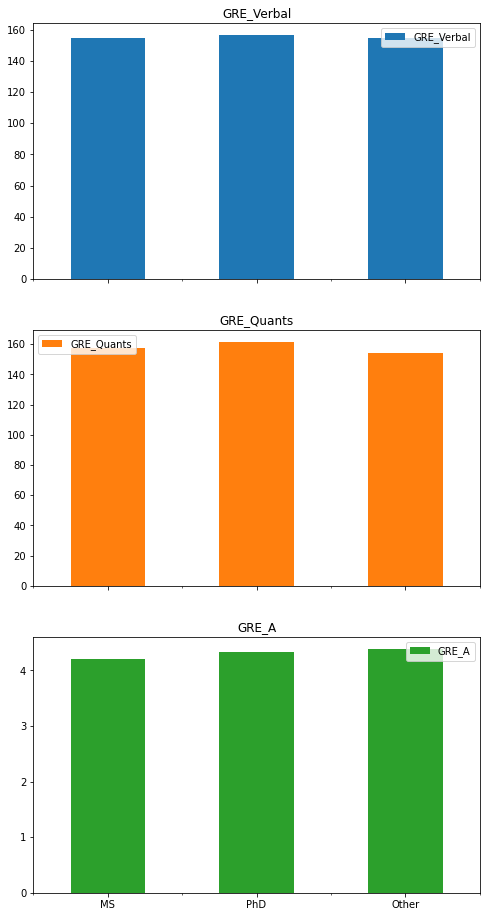

In [223]:
def meanValues(data):
 return [np.mean(data["greV"]),np.mean(data["greQ"]),np.mean(data["greA"])]

pd.unique(data["program"])
ms_data = data[data["program"]=="MS"]
mean_ms = meanValues(ms_data)

phd_data = data[data["program"]=="PhD"]
mean_PhD = meanValues(phd_data)

other_val = data[data["program"]=="Other"]
mean_other = meanValues(other_val)

df = pd.DataFrame([mean_ms,mean_PhD,mean_other],columns = ["GRE_Verbal","GRE_Quants","GRE_A"], index = ["MS","PhD","Other"])

axes = df.plot.bar(rot=0, subplots=True, figsize=(8,16))
axes[1].legend(loc=2)

print('Mean Gre Scores for MS :',mean_ms)
print('Mean Gre Scores for PHD :',mean_PhD)
print('Mean Gre Scores for Others :',mean_other)

## Incoming Students each Season

<AxesSubplot:xlabel='season'>

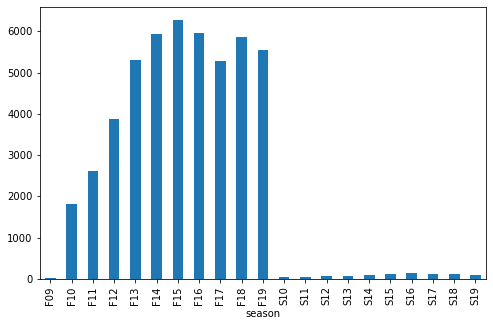

In [172]:
data_season = data[data['decision'] == "Accepted"].groupby("season").count().decision
data_season.plot.bar(figsize=(8,5))

In [173]:
data_season = data[data['decision'] == "Accepted"].groupby("season").count().decision
data_season

season
F09       8
F10    1801
F11    2619
F12    3879
F13    5294
F14    5941
F15    6274
F16    5946
F17    5288
F18    5858
F19    5553
S10      37
S11      42
S12      61
S13      75
S14      91
S15     125
S16     135
S17     123
S18     108
S19      84
Name: decision, dtype: int64

# Average Scores(GRE, CGPA) of Following top Universities

#### UC Berkeley  <br> University Of Pittsburgh <br>University Of Rochester <br>University Of Arizona <br>University Of Chicago <br>Pennsylvania State University <br>Harvard University <br>University Of Southern California <br>UC Santa Cruz <br>Stanford University <br>UCLA

                                         greQ        greV
univName                                                 
UC Berkeley                        163.785594  160.163261
University Of Pittsburgh           158.998234  156.407190
University Of Rochester            162.124512  154.846667
University Of Arizona              159.424645  156.523363
University Of Chicago              161.671309  160.031686
Pennsylvania State University      161.940668  154.702474
Harvard University                 163.499352  159.048770
University Of Southern California  162.085578  156.777797
UC Santa Cruz                      162.947534  157.840184
Stanford University                164.843766  156.566373
UCLA                               162.373278  158.529373


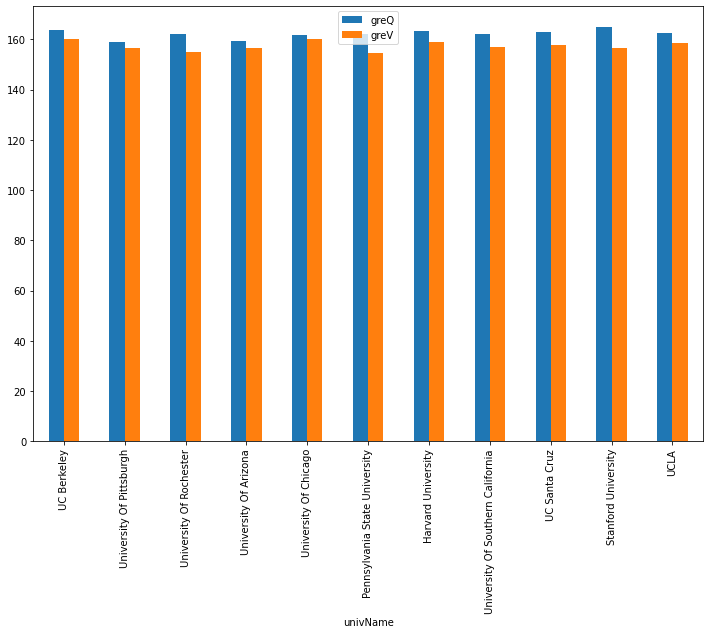

In [227]:
data.columns
data_uni = data[["univName","greQ","greV"]].groupby("univName").mean()
uni_list = ['UC Berkeley','University Of Pittsburgh','University Of Rochester','University Of Arizona','University Of Chicago','Pennsylvania State University','Harvard University','University Of Southern California','UC Santa Cruz','Stanford University','UCLA']
data_uni = data_uni.filter(items=uni_list,axis=0)
data_uni.head()
data_uni.plot.bar(figsize=(12,8))

print(data_uni)

                                       greA
univName                                   
UC Berkeley                        4.420534
University Of Pittsburgh           4.353895
University Of Rochester            4.153061
University Of Arizona              4.350490
University Of Chicago              4.549231
Pennsylvania State University      4.125203
Harvard University                 4.711130
University Of Southern California  4.161895
UC Santa Cruz                      4.443182
Stanford University                4.450653
UCLA                               4.275522


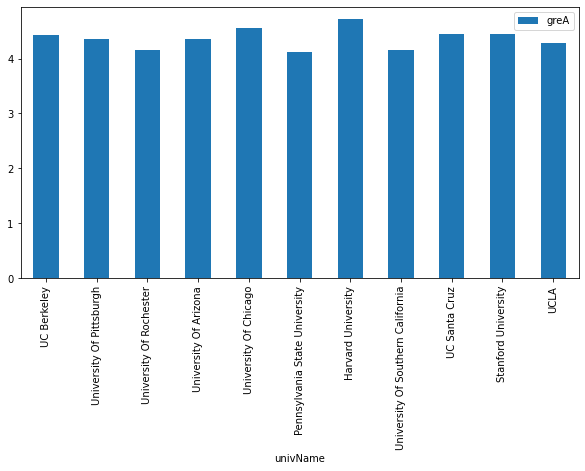

In [225]:
data.columns
data_uni = data[["univName","greA"]].groupby("univName").mean()
uni_list = ['UC Berkeley','University Of Pittsburgh','University Of Rochester','University Of Arizona','University Of Chicago','Pennsylvania State University','Harvard University','University Of Southern California','UC Santa Cruz','Stanford University','UCLA']
data_uni = data_uni.filter(items=uni_list,axis=0)
data_uni.head()
data_uni.plot.bar(figsize=(10,5))

print(data_uni)

                                       cgpa
univName                                   
UC Berkeley                        3.731053
University Of Pittsburgh           3.642375
University Of Rochester            3.608980
University Of Arizona              3.652010
University Of Chicago              3.726938
Pennsylvania State University      3.609593
Harvard University                 3.751896
University Of Southern California  3.616109
UC Santa Cruz                      3.619886
Stanford University                3.755060
UCLA                               3.679084


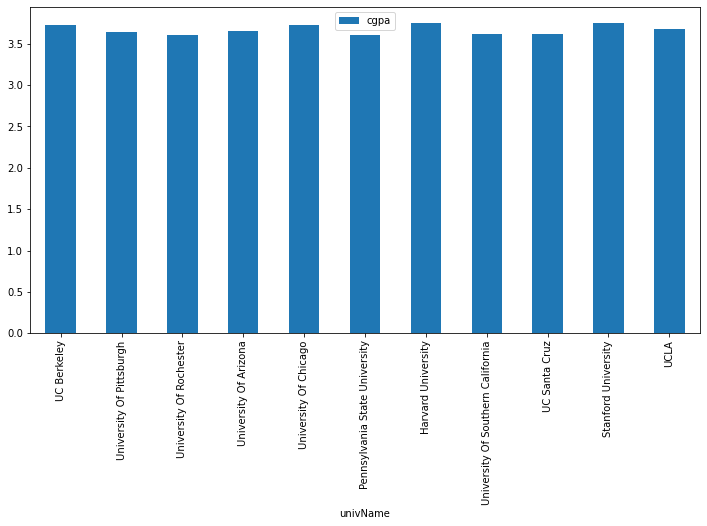

In [226]:
data_uni = data[["univName","cgpa"]].groupby("univName").mean()
uni_list = ['UC Berkeley','University Of Pittsburgh','University Of Rochester','University Of Arizona','University Of Chicago','Pennsylvania State University','Harvard University','University Of Southern California','UC Santa Cruz','Stanford University','UCLA']
data_uni = data_uni.filter(items=uni_list,axis=0)
data_uni.head()
data_uni.plot.bar(figsize=(12,6))

print(data_uni)

# Machine Learning Modelling

## K - Nearest Neighbors algorithm
#### For KNN we have used the data where applicant got acceptance in universites

In [178]:
data = data[data['decision'] =='Accepted']
data.shape

(49342, 11)

#### Unique Universities in the Data

In [179]:
uni_names = data['univName'].unique()

Unique_univs = pd.DataFrame({'univName':uni_names})
Unique_univs

,univName
0,New York University (NYU) - Steinhardt
1,Texas A&M University
2,"University Of California, Irvine"
3,Boston University
4,New York University (NYU) Steinhardt
...,...
4780,Columbia University GSAS
4781,New York University(NYU)
4782,DeVry University
4783,Oregon University


In [180]:
data.head()

,univName,major,program,season,decision,Method,cgpa,greV,greQ,greA,status
7,New York University (NYU) - Steinhardt,Communication Sciences And Disorders,MS,F19,Accepted,E-mail,3.59,157.0,147.0,4.0,American
17,Texas A&M University,International Affairs,MS,F19,Accepted,E-mail,3.57,157.0,151.0,5.5,American
46,"University Of California, Irvine",Biotechnology Management,MS,F19,Accepted,E-mail,3.66,155.0,167.0,4.0,International
64,Boston University,Psychology,MS,F19,Accepted,E-mail,3.10,161.0,157.0,4.0,American
70,New York University (NYU) Steinhardt,Speech Language Pathology (Online),MS,F19,Accepted,E-mail,3.68,149.0,157.0,3.0,American


#### Feature Selection For KNN 

We have used Important factors which is considered for selecting the universities i.e GRE scores and GPA

In [181]:
knn_data = data[['greV', 'greQ', 'greA', 'cgpa', 'univName']]
knn_data.head()

,greV,greQ,greA,cgpa,univName
7,157.0,147.0,4.0,3.59,New York University (NYU) - Steinhardt
17,157.0,151.0,5.5,3.57,Texas A&M University
46,155.0,167.0,4.0,3.66,"University Of California, Irvine"
64,161.0,157.0,4.0,3.10,Boston University
70,149.0,157.0,3.0,3.68,New York University (NYU) Steinhardt


#### Spliting the data for Training and Testing

In [182]:
random_indices = permutation(data.index)
test_cutoff = math.floor(len(data)/5)
print(test_cutoff)
test = knn_data.loc[random_indices[1:test_cutoff]]
train = knn_data.loc[random_indices[test_cutoff:]]
train_output_data = train['univName']
print("train Output data", train_output_data)
train_input_data = train
train_input_data = train_input_data.drop('univName',1)
print("train input data", train_input_data)
test_output_data = test['univName']
print("test Output data", test_output_data)
test_input_data = test
test_input_data = test_input_data.drop('univName',1)
print("test input data", test_input_data)

9868
train Output data 124002                                          UC Berkeley
314110                                    Boston University
393183                   University Of Pennsylvania (UPenn)
380888    The University Of North Carolina At Chapel Hil...
163948        The University Of Texas At Austin (UT Austin)
                                ...                        
317479                                 University Of Denver
393980       University Of Illinois Urbana Champaign (UIUC)
45415                     University Of Southern California
345323                         University Of Oregon, Eugene
68835                 Western Kentucky University On-Campus
Name: univName, Length: 39474, dtype: object
train input data               greV        greQ  greA  cgpa
124002  168.000000  162.000000   4.0  3.91
314110  140.425532  168.085106   4.0  3.30
393183  157.446809  130.000000   5.5  3.03
380888  144.680851  142.553191   5.0  3.90
163948  166.000000  151.000000   3.5  3.

C:\Users\DELL\AppData\Local\Temp/ipykernel_10744/1315269562.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_input_data = train_input_data.drop('univName',1)
C:\Users\DELL\AppData\Local\Temp/ipykernel_10744/1315269562.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_input_data = test_input_data.drop('univName',1)


#### Code for KNN Algorithm

In [183]:

def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

def knn(trainingSet, testInstance, k):
    print(k)
    distances = {}
    sort = {}
    length = testInstance.shape[1]

    for x in range(len(trainingSet)):

        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)
        
        distances[x] = dist[0]

    sorted_d = sorted(distances.items(), key=lambda x: x[1])

 
    neighbors = []

    for x in range(k):
        neighbors.append(sorted_d[x][0])

    classVotes = {}

    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1

    sortedVotes = sorted(classVotes.items(), key=lambda x: x[1], reverse=True)
 
    return(sortedVotes, neighbors)


### Input Data for Testing

In [184]:
# Input Data to Predict the Universities

testSet = [[170, 170, 5.5 , 4.0]]
test = pd.DataFrame(testSet)
test.shape

(1, 4)

In [185]:
k = 12

result,neigh= knn(knn_data, test, k)


list1 = []
list2 = []
list3 = []
for i in result:
    list1.append(i[0])
    list2.append(i[1])
for i in list1:
    print(i)
    

12
UC Berkeley
University Of Pittsburgh
University Of Rochester
University Of Arizona
University Of Chicago
Pennsylvania State University
Harvard University
University Of Southern California
UC Santa Cruz
Stanford University
UCLA


### Above are the Universities where student with the provided scores have a chance of getting an admit

#### Below we have used KNeighborsClassifier from sklearn library for predicting the same thing

In [186]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(knn_data.iloc[:,0:4], data['univName'])

print(neigh.predict(test))

['Pennsylvania State University']


### Streamlit

In [256]:
import pickle
pickle_out = open("neigh.pkl","wb")
pickle.dump(neigh, pickle_out)
pickle_out.close()

## Random Forest modelling

### For random forest we have used all data's with decision accepted and rejected (0,1)

In [187]:
data2 = data2.query('decision =="Accepted" or decision =="Rejected"')
data2['decision'].unique()

array(['Accepted', 'Rejected'], dtype=object)

#### Performing Label Encoding to convert the labels into a numeric form

In [188]:
data2['decision'] = data2[['decision']].apply(LabelEncoder().fit_transform)
data2['univName'] = data2[['univName']].apply(LabelEncoder().fit_transform)
data2['program'] = data2[['program']].apply(LabelEncoder().fit_transform)
data2['status'] = data2[['status']].apply(LabelEncoder().fit_transform)
data2['season'] = data2[['season']].apply(LabelEncoder().fit_transform)
data2['Method'] = data2[['Method']].apply(LabelEncoder().fit_transform)
data2

,univName,major,program,season,decision,Method,cgpa,greV,greQ,greA,status
7,1562,Communication Sciences And Disorders,4,10,0,0,3.59,157.000000,147.000000,4.0,0
17,2423,International Affairs,4,10,0,0,3.57,157.000000,151.000000,5.5,0
33,1141,Computer Science,6,10,1,4,3.90,159.000000,170.000000,5.0,1
46,3895,Biotechnology Management,4,10,0,0,3.66,155.000000,167.000000,4.0,1
58,4091,Materials Science And Engineering,6,10,1,0,3.58,159.000000,160.000000,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...
433928,2505,David Rockefeller Graduate Program,6,1,0,3,3.96,159.574468,161.702128,5.5,0
433944,3930,Biomedical Sciences (BMS) Program,6,1,1,0,3.90,130.000000,170.212766,4.0,2
433946,4003,Art Historyganic Chemistry,6,1,0,0,3.30,130.000000,163.829787,4.0,0
433972,4003,Chemistry,6,1,0,0,3.86,131.914894,170.212766,4.5,2


In [189]:
len(data2['univName'].unique())

5943

#### Feature Selection for Random Forest

In [190]:
X = data2[['univName','cgpa','greV','greQ','status','season','program','Method']]
Y = data2[['decision']]

#### Spliting the data for Training and Testing By 75%-25%

In [191]:
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 42, shuffle=True)

In [192]:
# Running the model on data 

Random_model = RandomForestClassifier(n_estimators = 4)
Random_model.fit(X_train,Y_train)
print("Random Forest accuracy: ", (Random_model.score(X_train,Y_train))*100)

C:\Users\DELL\AppData\Local\Temp/ipykernel_10744/676311403.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Random_model.fit(X_train,Y_train)


Random Forest accuracy:  92.77120267151206


In [193]:
# Predicting with test data

y_predict = Random_model.predict(X_test)

In [194]:
print(" Test Accuracy: ", metrics.accuracy_score(Y_test, y_predict))

ACCURACY OF THE MODEL:  0.6596935769004125


In [229]:
#Calculating the F1 score

report = classification_report(Y_test, Random_model.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.68      0.83      0.75     12292
           1       0.61      0.40      0.48      8072

    accuracy                           0.66     20364
   macro avg       0.64      0.62      0.61     20364
weighted avg       0.65      0.66      0.64     20364



In [233]:
#Confusion Matrix

metrics.confusion_matrix(Y_test, y_predict)

array([[10193,  2099],
       [ 4831,  3241]], dtype=int64)

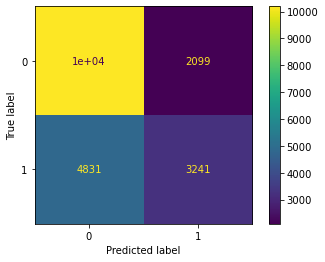

In [248]:
plot_confusion_matrix(Random_model,X_test,Y_test)  
plt.show()

### Hyperparameter tuning (Random Forest)

In [251]:
# Creating the hyperparameter grid
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
 
# Instantiating Decision Tree classifier
#tree = DecisionTreeClassifier()
 
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(Random_model, param_dist, cv = 5)
 
tree_cv.fit(X_train,Y_train)
 
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 4}
Best score is 0.6711847000172966


## Naive Bayes Algorithm

In [207]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
y_pred = nb.predict(X_test)
print("Naive Bayes score: ",nb.score(Y_test, y_pred))

Naive Bayes score:  0.6285602042820664


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Support Vector Machine

In [199]:
# svc = SVC()
# svc.fit(X_train, Y_train)
# y_pred = svc.predict(X_test)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [201]:
# accuracy_score(Y_test, y_pred)

0.6593989393046553

## Logistic Regression

In [205]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, Y_train)

y_pred = logreg.predict(X_test)
accuracy_score(Y_test, y_pred)

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6401001767825575

### Hyperparameter tuning (Logistic Regression)

In [253]:
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
 
# Instantiating logistic regression classifier
#logreg = LogisticRegression()
 
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
 
logreg_cv.fit(X_train, Y_train)
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\

D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\

Tuned Logistic Regression Parameters: {'C': 0.0007196856730011522}
Best score is 0.6442239749406344


D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## Convolutional neural network

In [206]:
#Single layer architecture
model = Sequential()
model.add(Dense(32,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(64,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(128,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(256,input_shape=(X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))
print(model.summary())
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd",metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=100, verbose=1, validation_data=(X_test, Y_test))
loss, accuracy = model.evaluate(X_test,Y_test, verbose=0)
print("Loss : "+str(loss))
print("Accuracy :"+str(accuracy*100.0))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 128)               8

478/478 [==============================] - 2s 3ms/step - loss: 0.5991 - accuracy: 0.6676 - val_loss: 0.6120 - val_accuracy: 0.6576
Epoch 41/100
478/478 [==============================] - 2s 3ms/step - loss: 0.5991 - accuracy: 0.6669 - val_loss: 0.6041 - val_accuracy: 0.6615
Epoch 42/100
478/478 [==============================] - 2s 3ms/step - loss: 0.5986 - accuracy: 0.6689 - val_loss: 0.6035 - val_accuracy: 0.6604
Epoch 43/100
478/478 [==============================] - 2s 3ms/step - loss: 0.5984 - accuracy: 0.6678 - val_loss: 0.6041 - val_accuracy: 0.6603
Epoch 44/100
478/478 [==============================] - 2s 3ms/step - loss: 0.5982 - accuracy: 0.6683 - val_loss: 0.6039 - val_accuracy: 0.6636
Epoch 45/100
478/478 [==============================] - 2s 3ms/step - loss: 0.5980 - accuracy: 0.6679 - val_loss: 0.6042 - val_accuracy: 0.6600
Epoch 46/100
478/478 [==============================] - 2s 3ms/step - loss: 0.5976 - accuracy: 0.6692 - val_loss: 0.6030 - val_accuracy: 0.6623
Epoch

Epoch 97/100
478/478 [==============================] - 2s 4ms/step - loss: 0.5889 - accuracy: 0.6755 - val_loss: 0.6055 - val_accuracy: 0.6578
Epoch 98/100
478/478 [==============================] - 2s 4ms/step - loss: 0.5888 - accuracy: 0.6758 - val_loss: 0.6323 - val_accuracy: 0.6266
Epoch 99/100
478/478 [==============================] - 2s 3ms/step - loss: 0.5886 - accuracy: 0.6750 - val_loss: 0.6024 - val_accuracy: 0.6626
Epoch 100/100
478/478 [==============================] - 2s 3ms/step - loss: 0.5886 - accuracy: 0.6767 - val_loss: 0.6043 - val_accuracy: 0.6616
Loss : 0.604311466217041
Accuracy :66.16086959838867


# Conclusion :

This project will help students in decision making of which University to choose for their higher education in other countries like USA.<br>
They can enter their Scores and can check the Universities to which the can apply<br>

Out of all the algorithms used we come to a conclusion that Random Forest Algorithm<br>
gives us the maximum accuracy of 92%<br>

<br>
Students can either check which universities to apply to (Through WEBPAGE - KNN trained Algorithm)<br>
or<br> 
Check if they can get into their dream university (Through Random Forest Classification)
